In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv('hw3.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


In [4]:
df.volumeUSD = df.volume * df.close
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         1830 non-null   object 
 1   open       1830 non-null   float64
 2   high       1830 non-null   float64
 3   low        1830 non-null   float64
 4   close      1830 non-null   float64
 5   volume     1830 non-null   float64
 6   volumeUSD  1830 non-null   float64
 7   token      1830 non-null   object 
 8   chain      1830 non-null   object 
dtypes: float64(6), object(3)
memory usage: 143.0+ KB


In [5]:
df.set_index('ts', inplace = True)
df.sort_index(inplace = True)

In [6]:
df.token.unique()

array(['CRV', 'USDT', 'BTC', 'UNI', 'ETH', 'COMP', 'AAVE', 'SOL',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">BTC</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>'], dtype=object)

In [7]:
df.chain.unique()

array(['ETH', 'USDT', 'BTC', 'SOL'], dtype=object)

In [8]:
df.token = df.token.str.replace('<span name="tokenName">', '')
df.token = df.token.str.replace('</span>', '')
df.token.unique()

array(['CRV', 'USDT', 'BTC', 'UNI', 'ETH', 'COMP', 'AAVE', 'SOL'],
      dtype=object)

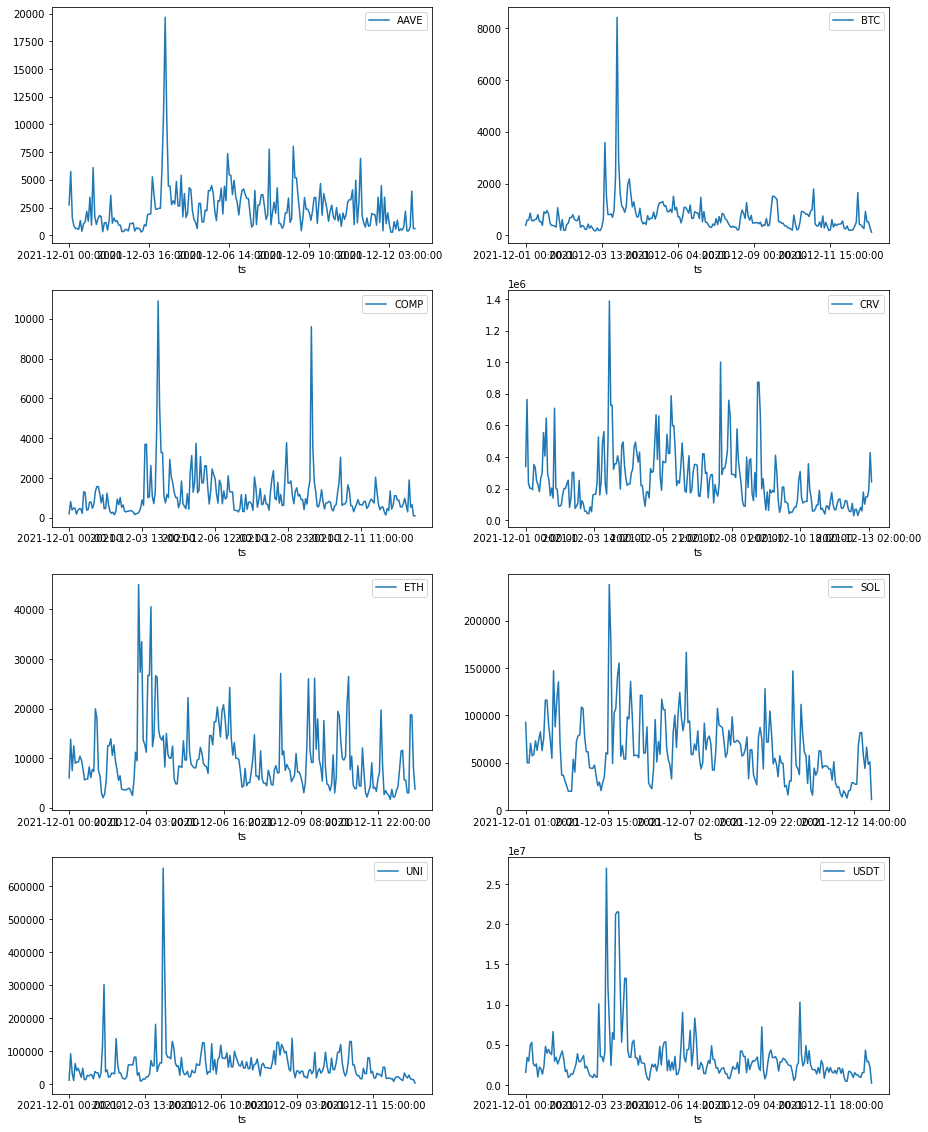

In [9]:
def plotFeature(feature):
    fig, axes = plt.subplots(nrows=math.ceil(len(df.token.unique()) / 2), ncols=2, figsize=(15, 5 * math.ceil(len(df.token.unique()) / 2)))
    idx = 0
    for label, df_token in df[['token', feature]].groupby('token'):
        df_token[feature].plot(ax=axes[idx // 2, idx % 2], label=label)
        axes[idx // 2, idx % 2].legend()
        idx += 1
plotFeature('volume')

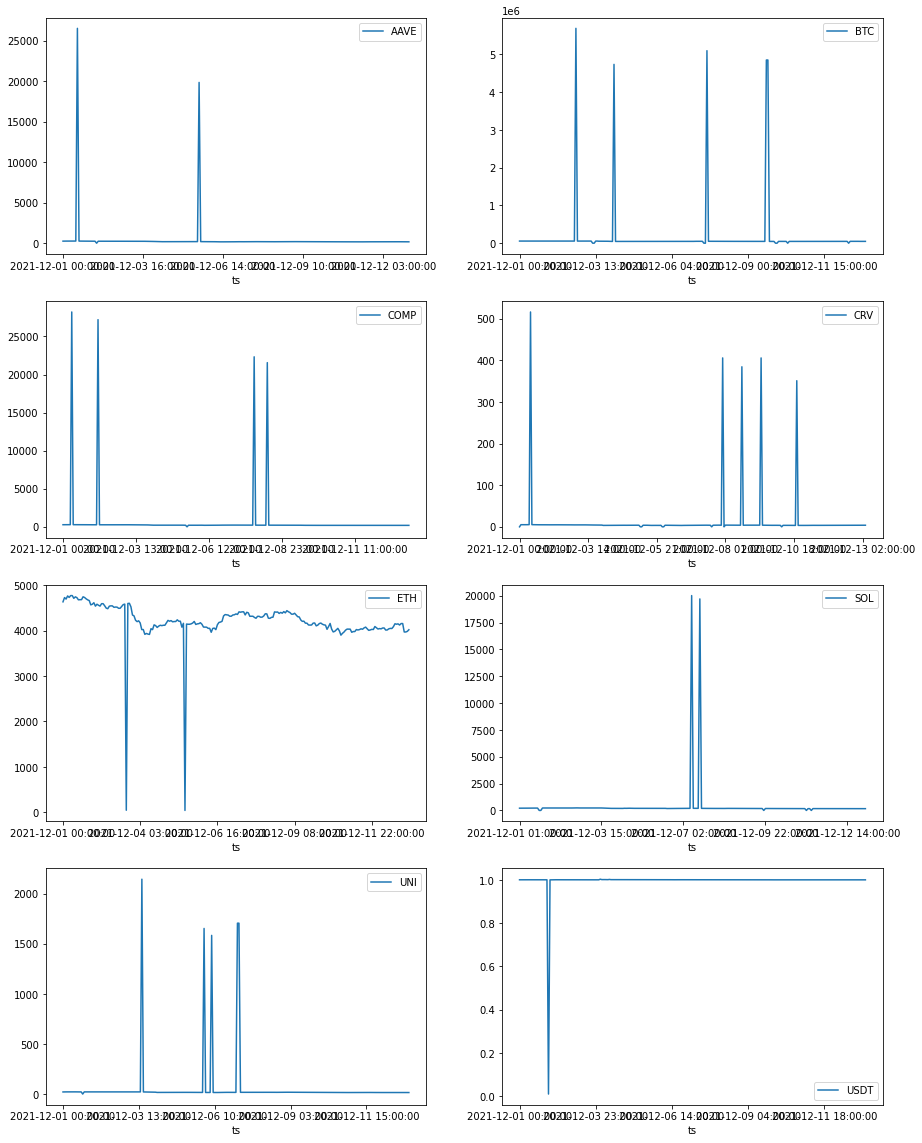

In [10]:
plotFeature('close')

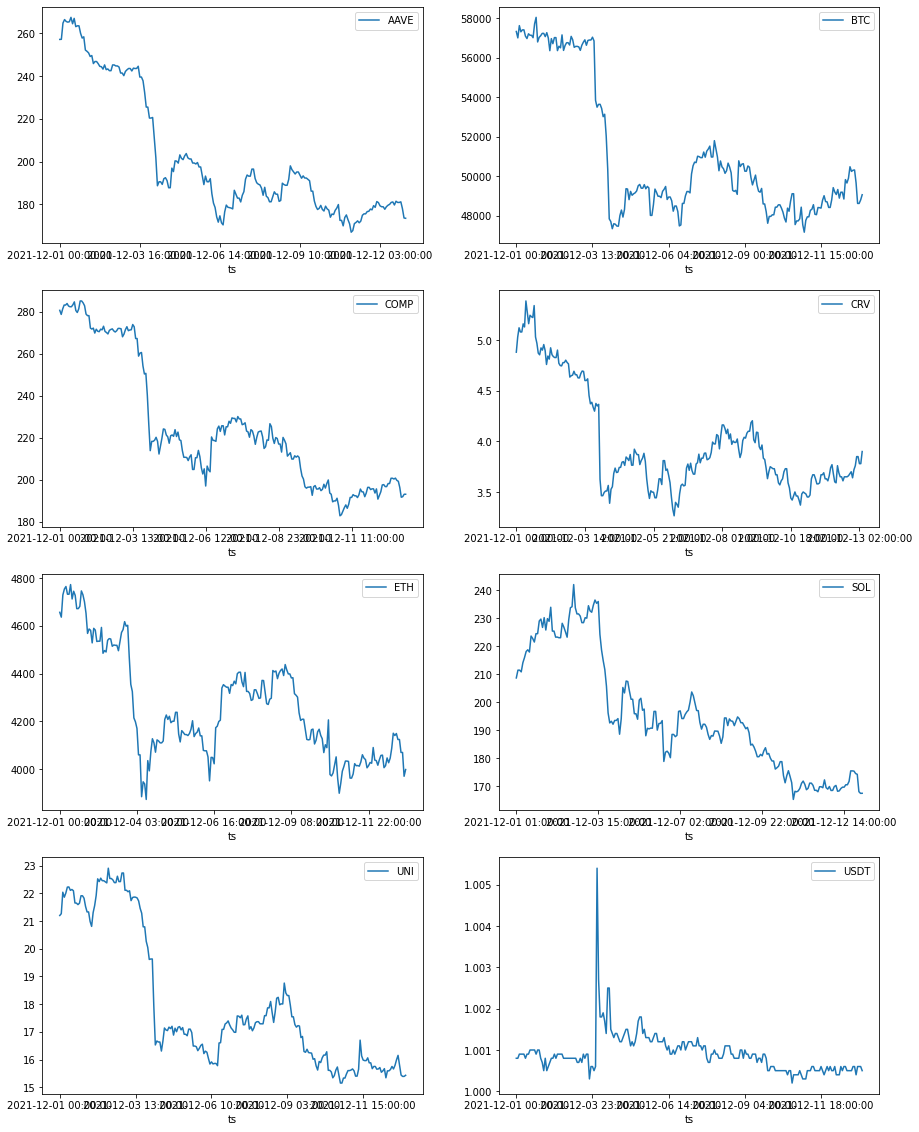

In [11]:
plotFeature('open')

In [12]:
condition = np.abs(np.log(df.close / df.open)) >= 1.5
df.loc[condition, 'close'] = 0.5 * (df.loc[condition, 'high'] + df.loc[condition, 'low'])

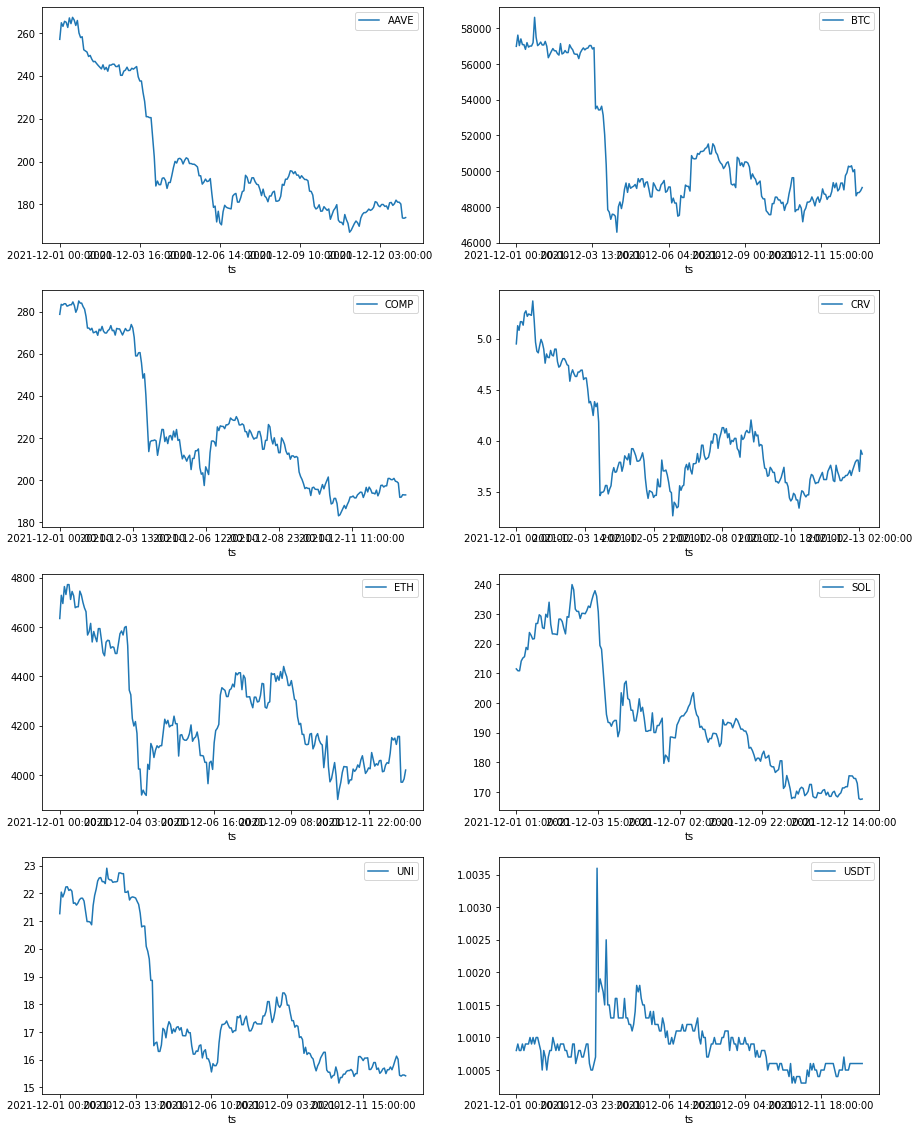

In [13]:
plotFeature('close')

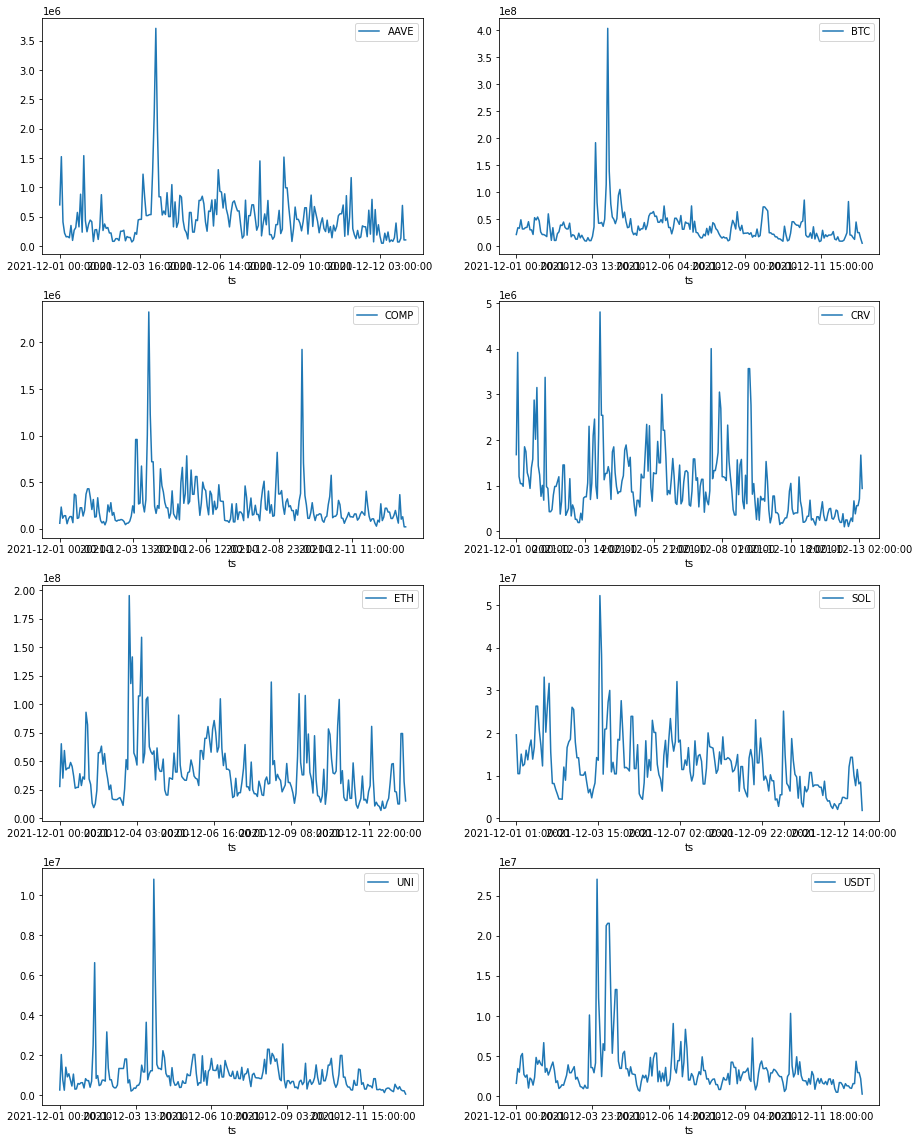

In [14]:
df.volumeUSD = df.volume * df.close
plotFeature('volumeUSD')

In [15]:
df_chains  = [df_chain for _ , df_chain in df[['chain', 'token', 'volumeUSD']].groupby('chain')]
for df_chain in df_chains:
    print(df_chain.token.value_counts())

BTC    228
Name: token, dtype: int64
CRV     253
COMP    238
UNI     229
ETH     225
AAVE    217
Name: token, dtype: int64
SOL    212
Name: token, dtype: int64
USDT    228
Name: token, dtype: int64


In [16]:
df.reset_index(inplace=True)

In [17]:
goal = df[['ts', 'chain', 'volumeUSD']].groupby(['ts', 'chain']).sum()
goal.reset_index(inplace = True)
goal.set_index('ts', inplace = True)
goal

,chain,volumeUSD
ts,,
2021-12-01 00:00:00,BTC,2.213880e+07
2021-12-01 00:00:00,ETH,3.057435e+07
2021-12-01 00:00:00,USDT,1.589673e+06
2021-12-01 01:00:00,BTC,3.455784e+07
2021-12-01 01:00:00,ETH,7.306441e+07
...,...,...
2021-12-13 05:00:00,USDT,2.180062e+06
2021-12-13 06:00:00,BTC,6.051271e+06
2021-12-13 06:00:00,ETH,9.762215e+04


As shown above, now we have the volumeUSD by chain. To present this result, I graph the following figure:

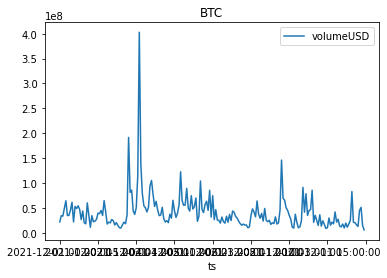

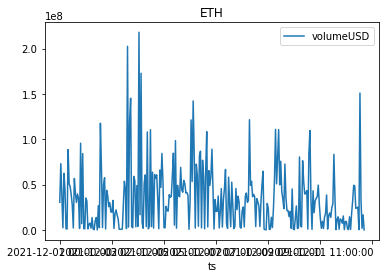

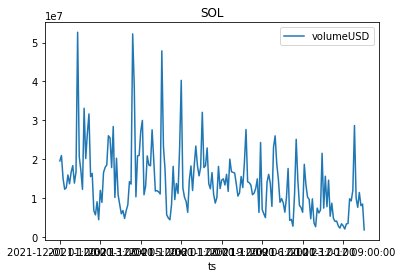

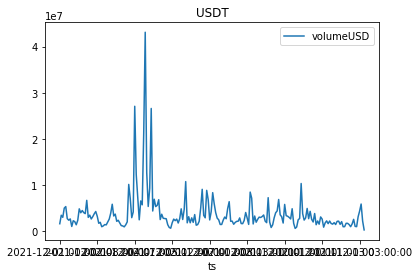

In [21]:
for label, volumeUSD_by_chain in goal.groupby('chain'):
    volumeUSD_by_chain.plot(title = label)